In [18]:
%pylab inline
import phreeqpython
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [33]:
pp = phreeqpython.PhreeqPython(database='phreeqc.dat')

## Oxygen

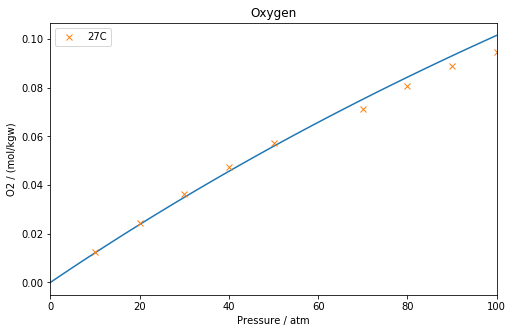

In [49]:
pressure_range = np.linspace(0.01, 100, 100)
o2 = []
for p in pressure_range:
    sol = pp.add_solution({'temp':27})
    gas = pp.add_gas({'O2(g)':p}, pressure=p, fixed_pressure=True)
    sol.interact(gas)
    o2.append(sol.total('O2', 'mol'))
    sol.forget();gas.forget()

plt.figure(figsize=[8,5])
plt.plot(pressure_range, o2)
pd.read_csv('gas_data/O2_27.dat', sep='\t', index_col=0).plot(style='x', ax=plt.gca())
plt.title('Oxygen')
plt.xlabel('Pressure / atm')
plt.ylabel('O2 / (mol/kgw)')
plt.show()

## Nitrogen

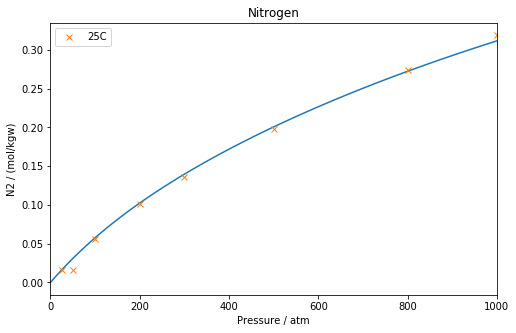

In [51]:
pressure_range = np.linspace(0.01, 1000, 100)
n2 = []
for p in pressure_range:
    sol = pp.add_solution({'temp':25})
    gas = pp.add_gas({'N2(g)':p}, pressure=p, fixed_pressure=True)
    sol.interact(gas)
    n2.append(sol.total_element('N', 'mol')/2)
    sol.forget();gas.forget()

plt.figure(figsize=[8,5])
plt.plot(pressure_range, n2)
pd.read_csv('gas_data/n2_25C.dat', sep='\t', index_col=0).plot(style='x', ax=plt.gca())
plt.title('Nitrogen')
plt.xlabel('Pressure / atm')
plt.ylabel('N2 / (mol/kgw)')
plt.show()

## Methane

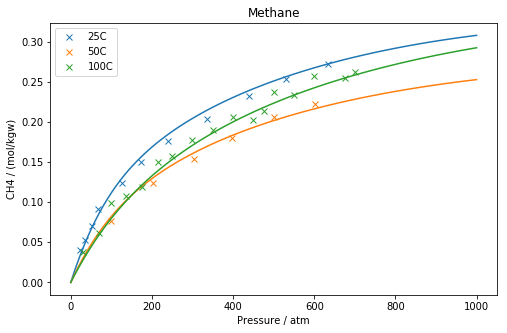

In [102]:
plt.figure(figsize=[8,5])
colors = ['C0', 'C1', 'C2']

for temp in [25,50,100]:
    
    pressure_range = np.linspace(0.01, 1000, 100)
    ch4 = []
    
    for p in pressure_range:
        sol = pp.add_solution({'temp':temp})
        gas = pp.add_gas({'CH4(g)':p}, pressure=p, fixed_pressure=True)
        sol.interact(gas)
        ch4.append(sol.total('CH4', 'mol'))
        sol.forget();gas.forget()


    plt.plot(pressure_range, ch4)
    data = pd.read_csv('gas_data/ch4_{}c.dat'.format(temp), sep='\t', index_col=0)
    plt.plot(data, 'x', color=colors.pop(0), label='{}C'.format(temp))
    
plt.title('Methane')
plt.xlabel('Pressure / atm')
plt.ylabel('CH4 / (mol/kgw)')
plt.legend()
plt.show()

## CO2 in 4M NaCl solution

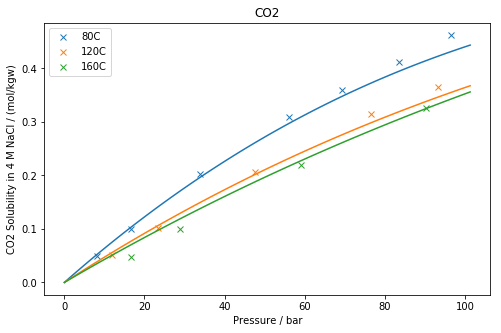

In [140]:
# Use the Pitzer database for this calculation
pitzer = phreeqpython.PhreeqPython(database='pitzer.dat')

plt.figure(figsize=[8,5])
colors = ['C0', 'C1', 'C2']
index = 0
for temp in [80,120,160]:
    
    pressure_range = np.linspace(0.01, 100, 100)
    ch4 = []
    
    for p in pressure_range:
        sol = pitzer.add_solution({'temp':temp})
        sol.add('NaCl', 4 , 'mol')
        gas = pitzer.add_gas({'CO2(g)':p}, pressure=p, fixed_pressure=True)
        sol.interact(gas)
        ch4.append(sol.total_element('C', units='mol'))
        sol.forget();gas.forget()

    plt.plot(pressure_range*1.013, ch4)
    data = pd.read_csv('gas_data/co2_4m_NaCl.dat', sep='\t', index_col=0)
    plt.plot(data.iloc[:,index], 'x', color=colors.pop(0))
    index+=1
    
plt.title('CO2')
plt.xlabel('Pressure / bar')
plt.ylabel('CO2 Solubility in 4 M NaCl / (mol/kgw)')
plt.legend()
plt.show()